image.png

<h1><center><b>Segmentación de Objetos Desconocidos en Imágenes RGB-D</b></center></h1>
<h3><center><b>Machinne Learning</b></center></h3>
<h8><center>s.sierra11@uniandes.edu.co<center><h8>
<h8><center>ea.briceno10@uniandes.edu.co<center><h8>

image.png

### **NOTEBOOK CON LA SOLUCIÓN FINAL**


## **Contenido**
1. [**Resumen**](#id1)
2. [**Introducción**](#id2)
3. [**Método**](#id3)
4. [**Resultados**](#id4)
5. [**Discusión**](#id5)
6. [**Bibliografías**](#id6)



## **Resumen** <a name="id1"></a>

<p align="justify">
El desarrollo de este proyecto se centra en el desarrollo e implementación de una red neuronal convolucional basada en aprendizaje supervisado, que permita realizar una segmentación no categorica de una imagen a partir de información RGB-D, el  desarrollo se centra en identificar y clasificar los conjuntos de píxeles que pertenecen a cada objeto en la imagen, sin tener información y conocimiento previo  de  los  posibles  tipos de  objetos  que  se  encuentran  en  la imagen.




A continuación se presenta el desarrolló y los resultados obtenidos, junto con las limitaciones y dificultades presentadas a lo largo del desarrollo del proyecto. Este notebook se presenta como soporte del articulo presentado.

## **Introducción** <a name="id2"></a>

<p align="justify">
En miras de los diferentes avances que día día se realizan en el campo de la visión artificial o visión por ordenador, cada vez son más los proyectos ambiciosos que buscan poder extraer la mayor cantidad de información posible de una imagen, para seguidamente ser procesada e identificar un sin fin de características relevantes dependiendo de la tarea que se está realizando. En este orden de ideas en este proyecto se contemplan las situaciones en las cuales estos algoritmos y métodos se enfrentan a ambientes desorganizados y a objetos que no se conocían previamente. Un ejemplo de challenge en el cual se puede ver esto es en el Amazon Robotics Challenge, en donde un brazo robótico tiene que hacer tareas de picking y reconocimiento de objetos desorganizados en una bandeja. En el presente proyecto se aborda este tipo de situación en donde se tiene un dataset con gran cantidad de imágenes de objetos diferentes y el objetivo es poder identificar los objetos que se encuentran en la imagen y segmentarlos dentro de la misma. Para esto, se construyó una red capaz de realizar segmentación semántica en imágenes RGB-D. Se recurrió a utilizar imágenes RGB-D bajo la hipótesis que al considerar información de profundidad sobre la imagen se facilita la delimitación de los objetos frente al fondo y a su vez frente a a otros objetos. 

#### **Objetivos** <a name="id2"></a>

 
- Crear una red neuronal capaz de realizar una segmentación de una imagen conociendo la información RGB y depth de la misma.
- Identificar y separar los objetos existentes en un espacio sin importar que estos fueran conocidos previamente.

## **Método**<a name="id3"></a>


<p align="justify">Tras haber realizado pruebas y evaluar el desempeño obtenido al buscar resolver nuestro problema únicamente utilizando imágenes RGB (sin considerar la depth) se pudo observar que la red presenta dificultad para definir en donde se encuentran los objetos y diferenciarlos entre ellos mismos y el fondo. De esta manera con el fin de añadir la información Depth se procedió a modificar la naturaleza de nuestras imágenes originales, ya no se considera que estas van a trabajan en RGB sino que por el contrarió se consideró el uso de imágenes GBD. Esto quiere decir que el canal correspondiente a la componente rojo de nuestras imágenes se sustituyó por la información Depth, bajo la hipótesis de que la información RGB no nos esta dando suficiente información y seguir manipulando imágenes 3d frente a imágenes 2d facilita el entrenamiento y la velocidad del mismo. 

En esta sección se presenta toda la estructuración del dataset, la selección y creación del modelo, el método de entrenamiento realizado y los pasos adicional para llegar a los resultados obtenidos   

#### **Dataset** <a name="id2"></a>

Para la construcción de la red propuesta, se planteo su implementación a través de dos posibles datasets de imágenes RGB-D. Los cuales se presentan continuación:



*   **NYU Depth Dataset V2**<br>
<p align="justify">
La motivación detrás de este dataset se basa en el lograr identificar objetos específicos o una variedad de objetos específicos dentro de una imagen con una gran cantidad de objetos, la presencia de la profundidad de la imagen puede permitir tener unas mejores nociones de las dimensiones de dichos objetos. Este dataset contiene el siguiente conjuntos de datos: <br>
Tiene unas 1449 imágenes RGB-D con las etiquetas correspondientes a todos y cada uno de los objetos. Estas imágenes pertenecen a 3 escenas distintas entra habitaciones de una casa, oficinas y escuela, dentro de las cuales existe una gran cantidad de objetos distintos.
. <br>
Página oficial del dataset: <br>https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html
*   **WISDOM-SIM + WISDOM - REAL** <br>
<p align="justify">
La motivación detrás de este dataset se basa en el potencial que puede haber en tareas de  grasping y manipulación robótica si el robot o manipulador esta en capacidad de segmentar objetos desconocidos dentro de imagenes de profundidad. Este dataset se encuentra dividido en dos conjuntos de datos: <br>
Por un lado se tiene un conjunto de datos real WISDOM-Real el cual conta de 800 imágenes RGB-D y contiene un total de 3849 instancias de un total de 50 objetos físicos reales. Así mismo, cada imagen tiene su respectiva versión de alta y baja resolución (incluyendo las imagenes a color de los objetos y las imagenes de profundidad). <br>
Por otro lado, considerando que el tiempo de generación de este tipo de datasets es extenso, se presenta también un conjunto de datos de entrenamiento sintetico con mas de 50.000 imágenes de profundidad y mascaras de segmentación generadas a partir de 1600 objetos extraidos de Thingverse, Kit y 3DNET. [2] <br> 
Página oficial del dataset: <br>https://sites.google.com/view/wisdom-dataset/home






<p align="justify">
Teniendo en cuenta la estructura, la cantidad de imágenes y el formato de ambos dataset, se procedio a seleccionar el dataset WISDOM frente al dataset NYU Depth. Esto debido a que su enfoque tambien se basa en poder llegar a segmentar objetos desconocidos y consideramos que el uso de este dataset, tiene un mayor interes y posible utilidad en competencias como el amazon picking challenge en donde estariamos contribuyendo a un mejor reconocimiento de los objetos. <br>


<p align="justify">
Mas específicamente se seleccionó el dataset WISDOM-Real-Full el cual consta de 400 imágenes las cuales separamos en 350 imágenes para entrenamiento y 50 imágenes para validación. El objetivo es poder comenzar la construcción de nuestro modelo y seguido a esto trabajar con el dataset de forma completa. <br> 
De igual manera, nuestro interés es poder encontrar mejoras en el desempeño del modelo una vez que este tenga información depth de la escena. Para eso, primero nos encontramos trabajando en una segmentación de imágenes RGB con nuestro dataset para luego comparar su desempeño con una segmentación RGB-D en donde tenemos mucha más información de la escena.


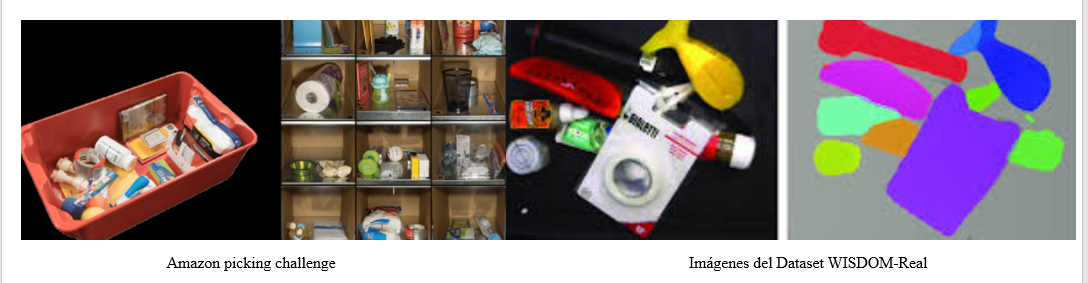

<p align="justify">
El dataset Wisdom Real se encuentro compuesto por imágenes RGB de los objetos, su correspondiente imagen Depth (una imágen en escala de grises de 0 a 255 en donde el valor de cada píxel representa la distancia a la cual se encuentra el objeto) y una imagen con las máscaras de cada objeto (resultado final).

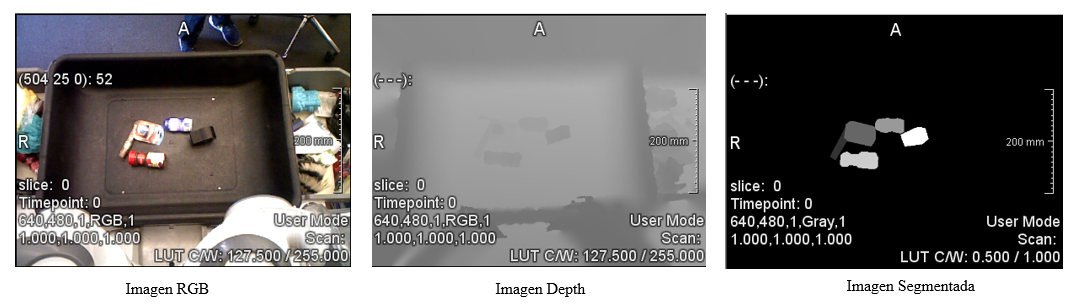

De esta manera la estructura del dataset con el cual se trabja es la siguiente

`<dataset root directory>` <br><br>
`___wisdom-real` <br>
`_______low-res` <br>
`__________color_ims` <br>
`______________image_000000.png` <br>
`______________image_000001.png` <br>
`______________...` <br>
`__________depth_ims` <br>
`______________image_000000.png` <br>
`______________image_000001.png` <br>
`______________...` <br>
`______________...` <br>
`__________modal_segmasks` <br>
`______________image_000000.npy` <br>
`______________image_000001.npy` <br>
`______________...` <br>




<p align="justify">
Para la visualización inicial de las imágenes y su estudio se utilizo el software de análisis y procesamiento de imágenes médicas conocido como MeVisLab. Este nos facilitó ver la estructura inical de las imagenes y el valor de cada pixel dentro de ella. Adicionalmente a esto, todo el desarrollo del proyecto se realizó utilizando google colab. <br><br>

#### **Librerías necesarias para el Proyecto**<a name="id4"></a>

A continuación se importan las librerias necesarias el desarrollo del notebook.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from glob import glob
import shutil
import argparse
import zipfile
import hashlib
import requests
from tqdm import tqdm
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime, os
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
import tensorflow_addons as tfa
AUTOTUNE = tf.data.experimental.AUTOTUNE

import os  
!pip install bokeh
import PIL # optional
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from PIL import Image
import numpy
from google.colab.patches import cv2_imshow

import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()


#### **Carga de los Datos**<a name="id5"></a>

Como se mencionó previamente para el desarrollo usaremos un dataset conocido como `WISDOM-Real`, para su prepración inicialmente se subió el dataset en google drive y realizó su importanción al entrono de colab. En determinado caso de querer replicar el proyecto a continuación se presenta el link en el cual se encuentra el dataset ya organizado en drive
https://drive.google.com/drive/folders/1oaBK0mmAexeq8rt20ei3_7qNcayZ5_y6?usp=sharing

<font color=”blue” size="2"> Celdas enfocadas en realiza la preparación del ambiente junto con la carga del dataset </font>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
###################################################################
# Creación de directorios en donde se va a almacenar el dataset
###################################################################

directory = "DATASETREALsinprocessar"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

# Carpetas de las imagenes RGB

directory = "RGB"
parent_dir = "/content/DATASETREALsinprocessar/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Training"
parent_dir = "/content/DATASETREALsinprocessar/RGB"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Validation"
parent_dir = "/content/DATASETREALsinprocessar/RGB"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


# Carpetas de las imagenes depth
directory = "depth"
parent_dir = "/content/DATASETREALsinprocessar/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Training"
parent_dir = "/content/DATASETREALsinprocessar/depth"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Validation"
parent_dir = "/content/DATASETREALsinprocessar/depth"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


# Carpetas de las imagenes MASK
directory = "mask"
parent_dir = "/content/DATASETREALsinprocessar/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Training"
parent_dir = "/content/DATASETREALsinprocessar/mask"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "Validation"
parent_dir = "/content/DATASETREALsinprocessar/mask"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

In [ ]:
###################################################################
# Extracción del dataset y almacenamiento
###################################################################

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/TrainingDepth.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/depth/Training')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/TrainingMASK.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/mask/Training')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/TrainingRGB.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/RGB/Training')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/TrainingSegmentation.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETFINAL/annotations/training')



with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/ValidationDepth.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/depth/Validation')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/ValidationMASK.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/mask/Validation')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/ValidationRGB.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETREALsinprocessar/RGB/Validation')

with zipfile.ZipFile('/content/gdrive/MyDrive/ML Dataset/FINALFINAL/ValidationSegmentation.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/DATASETFINAL/annotations/validation')


A continuación se puede ver un ejemplo de las imágenes cargadas

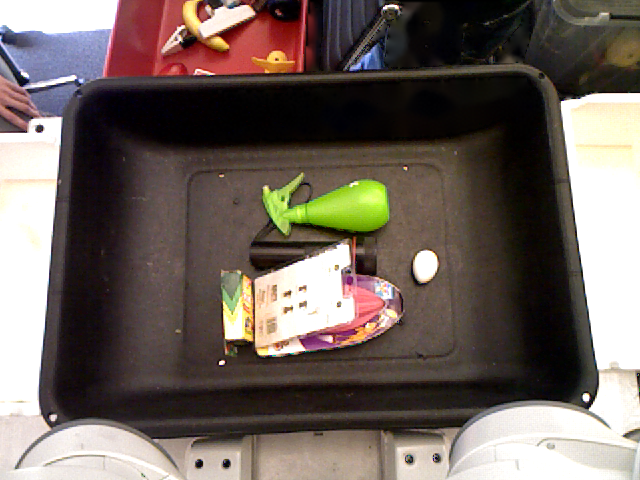

In [ ]:
img = cv2.imread('/content/DATASETREALsinprocessar/RGB/Validation/image_000350.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#### **Creación de nuestras imágenes RGD**<a name="id6"></a>



1.   Creación de directorios




In [ ]:

########################################################################
########################################################################
# DATASET CON IMÁGENES FINALES
########################################################################
########################################################################

directory = "DATASETFINAL"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "images"
parent_dir = "/content/DATASETFINAL/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "training"
parent_dir = "/content/DATASETFINAL/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "validation"
parent_dir = "/content/DATASETFINAL/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


directory = "annotations"
parent_dir = "/content/DATASETFINAL/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "training"
parent_dir = "/content/DATASETFINAL/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "validation"
parent_dir = "/content/DATASETFINAL/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


2.   Conversión de formato y remplazo del canal Rojo por la información Depth



In [ ]:
  #####################################################
  ## Conversión de las imagenes de Entrenamiento
  ####################################################
folder_pathRGB = "/content/DATASETREALsinprocessar/RGB/Training"
folder_pathDepth = "/content/DATASETREALsinprocessar/depth/Training"


png_folder_path = "/content/DATASETFINAL/images/training"
images_path = os.listdir(folder_pathRGB)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)

    # Imagen Depth
    inicio=folder_pathDepth +'/'+ image
    imgDepth=cv2.imread(inicio)
    grayDepth = cv2.cvtColor(imgDepth, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(grayDepth)
    imgDepth=grayDepth

    # Imagen RGB
    inicio=folder_pathRGB +'/'+ image
    imgRGB=cv2.imread(inicio)
    grayRGB = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
    b,g,r = cv2.split(imgRGB)
    #cv2_imshow(grayRGB)
    imgRGB=b
    imgMask=g
    
    FINAL=cv2.merge((imgRGB,imgDepth,imgMask))


    cv2.imwrite(os.path.join(png_folder_path,image),FINAL)


In [ ]:
  #####################################################
  ## Conversión de las imagenes de Validación
  ####################################################
folder_pathRGB = "/content/DATASETREALsinprocessar/RGB/Validation"
folder_pathDepth = "/content/DATASETREALsinprocessar/depth/Validation"
folder_pathMask = "/content/DATASETREALsinprocessar/mask/Validation"



png_folder_path = "/content/DATASETFINAL/images/validation"
images_path = os.listdir(folder_pathRGB)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)



    # Imagen Depth
    inicio=folder_pathDepth +'/'+ image
    imgDepth=cv2.imread(inicio)
    grayDepth = cv2.cvtColor(imgDepth, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(grayDepth)
    imgDepth=grayDepth

    # Imagen Mask
    inicio=folder_pathMask +'/'+ image
    imgMask=cv2.imread(inicio)
    grayMask = cv2.cvtColor(imgMask, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(grayMask)
    imgMask=grayMask

    # Imagen RGB
    inicio=folder_pathRGB +'/'+ image
    imgRGB=cv2.imread(inicio)
    grayRGB = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
    b,g,r = cv2.split(imgRGB)
    #cv2_imshow(grayRGB)
    imgRGB=b
    imgMask=g


    FINAL=cv2.merge((imgRGB,imgDepth,imgMask))


    cv2.imwrite(os.path.join(png_folder_path,image),FINAL)


3.   Resultado final obtenido imagen GBD (Green + Blue + Depth)


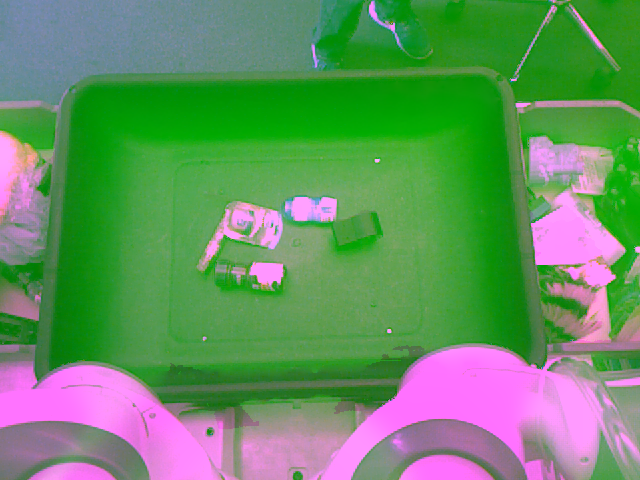

In [ ]:
img = cv2.imread('/content/DATASETFINAL/images/training/image_000000.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#### **Estructuración final de los Datos**<a name="id7"></a>

<p align="justify">
Una vez el dataset se encuentra completamente organizado y estructurado, y ya se tienen las imágenes con la información depth incorporada se procede a prepararlas para ser utilizadas por nuestro modelo, en este caso pasamos de tener imágenes RGB a imágenes GB+Depth y por último se transforman en un tensor tf.float32 normalizado. Este proceso se realiza tanto para las imágenes de entrenamiento como de validación.


Para realizar el entrenamiento de la red se dividieron las 400 imágenes inciales como 350 imágenes de entrenamiento y 50 imágenes de validación.

In [ ]:
# Semilla aleatoria para generar repetividad
SEED = 10

In [ ]:
# Path para la lectura de las imagenes
root = "/content/"
dataset_path = root + "DATASETFINAL/images"
training_data = "/training/"
val_data = "/validation/"

In [ ]:
# Tamaño de la imagen
IMG_SIZE = 128
# Canales presentes (En este caso tenemos 3 debido a la imagen Green+Blue+Depth pero próximamente
#trabajaremos con la imagen GB-D) 
N_CHANNELS = 3
N_CLASSES = 15

In [ ]:
TRAINSET_SIZE = len(glob(dataset_path + training_data + "*.png"))
print(f"The Training Dataset contains {TRAINSET_SIZE} images.")

VALSET_SIZE = len(glob(dataset_path + val_data + "*.png"))
print(f"The Validation Dataset contains {VALSET_SIZE} images.")

The Training Dataset contains 350 images.
The Validation Dataset contains 50 images.


<font color=”blue” size="2"> Celdas enfocadas para preparar los datos para nuestro modelo </font>

In [ ]:
def parse_image(img_path: str) -> dict:
    """Load an image and its annotation (mask) and returning
    a dictionary.
    Parameters
    img_path : str
        Image (not the mask) location.
    Returns
    dict
        Dictionary mapping an image and its annotation.
    """
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.uint8)
    mask_path = tf.strings.regex_replace(img_path, "images", "annotations")
    mask_path = tf.strings.regex_replace(mask_path, "jpg", "jpg")
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.where(mask == 255, np.dtype('uint8').type(0), mask)

    return {'image': image, 'segmentation_mask': mask}

In [ ]:
###################################################
# Construcción de datasets de entrenamiento y 
# validación
###################################################
train_dataset = tf.data.Dataset.list_files(dataset_path + training_data + "*.png")
train_dataset = train_dataset.map(parse_image)

val_dataset = tf.data.Dataset.list_files(dataset_path + val_data + "*.png")
val_dataset =val_dataset.map(parse_image)

In [ ]:
###################################################
# Normalización de las imagenes de 0 a 1
###################################################

@tf.function
def normalize(input_image: tf.Tensor, input_mask: tf.Tensor) -> tuple:
    """Rescale the pixel values of the images between 0.0 and 1.0
    compared to [0,255] originally.
    Parameters
    input_image : tf.Tensor [SIZE,SIZE,3].
    input_mask : tf.Tensor [SIZE,SIZE,1].
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

###################################################
# Rotación de imagen original y de la imagen segmentada
###################################################
@tf.function
def load_image_train(datapoint: dict) -> tuple:

    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

###################################################
# Normalización de las imagenes de Test
###################################################

@tf.function
def load_image_test(datapoint: dict) -> tuple:
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
BATCH_SIZE = 5
BUFFER_SIZE = 1000
IMG_SIZE = 128
dataset = {"train": train_dataset, "val": val_dataset}

###################################################
# Preparación del set de Entrenamiento
###################################################
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

###################################################
# Preparación del set de Validación
###################################################
dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])


<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>


Por ultimo, una vez que el dataset ya se encuentra preparado se procede a visualizar las imágenes originales con su correspondiente imagen segmentada.

In [ ]:
def display_sample(display_list):
    plt.figure(figsize=(12, 12))
    title = ['Input Image', 'Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

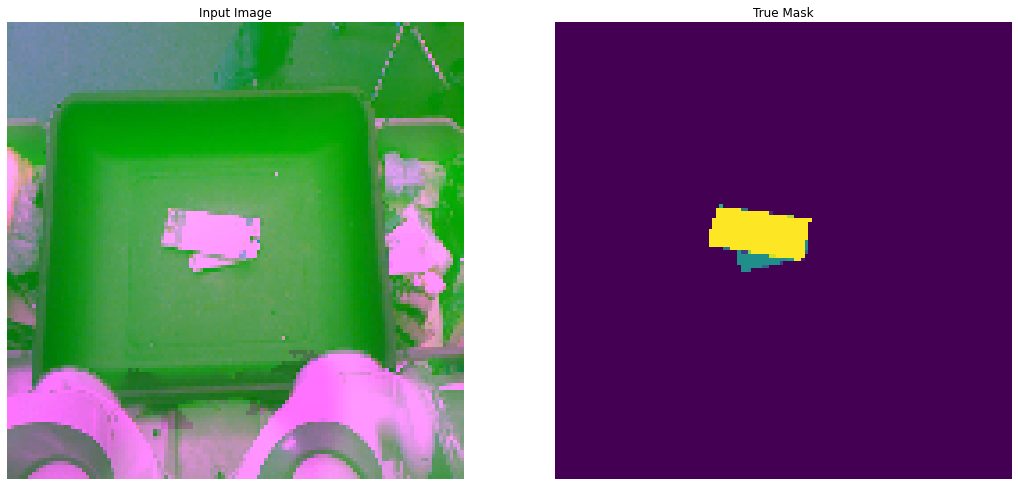

In [ ]:
###################################################
# Imagen de validación
###################################################
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

display_sample([sample_image[0], sample_mask[0]])

#### **Selección del Modelo**<a name="id7"></a>

<p align="justify">
Debido a que el modelo que se desea construir debe realizar tareas de segmentación de imagenes, especificamente segmentación semantica. Se espera clasificar cada pixel en una clase en particular, pero no se realiza distinción entre objetos de la misma clase. Por ejemplo, si hay dos tijeras en la imagen ambas tendrían la misma clasificación. Para realizar este tipo de segmentación, es necesario entender toda la estructura de la escena, por que no basta con averiguar que objetos hay en la imagen, sino también conocer que píxeles corresponden a cada objeto.  <br> <br>

Teniendo esto en cuenta, se contemplaron otras consideraciones: <br>


*  <p align="justify">Para poder realizar una correcta segmentación de una imagen es necesario tener información espacial de la misma (es importante conocer la distribución de los píxeles, sus n-vecinos y su estructura) si vemos la imagen únicamente como un vector, para nuestra red va a ser más complicado poder estimar gran cantidad de relaciones. Siendo así, se optó por usar una red neuronal convoluciónal CNN en donde la entrada y la salida también sean una imagen y no un vector de longitud fija.


*  <p align="justify">Tras la busqueda y el análisis del estado del arte, de modelos y redes implementadas que permiten realizar este tipo de tarea. Se encontró que las prinicipales arquitecturas se basan en una estructura de tipo encoder y decoder. En donde las primeras capas de la red proceden a aprender conceptos de bajo nivel, como bordes y colores y las capaz de últimos niveles aprenden conceptos mas relevantes como por ejemplo objetos. 
Según este tipo de arquitecturas, en la etapa del encoder se busca reducir la imagen aumentando el numero de canales de la misma hasta llegar a un tensor de baja resolución y despues de esto se proceden a añadir nuevas capas de convolución y de muestreo con el fin de disminuir el número de canales y reconstruir una imagen con la información previamente extraída.
Cuando se busca realizar una clasificación semántica a la salida del encoder vamos a tener un tensor con información sobre los objetos de la imagen y seguido a esto, el decodificador en su busqueda de reconstruir la imagen original va a ser el encargado de construir los mapas de segmentación. <br>  En otras palabras, se busca reestringir la red para forzarla a aprender una nueva representación de los datos y luego hacer que esta tenga que reconstruir la entrada pero a traves de esa representación intermedia de baja dimensionalidad.




Ahora, según el estado del arte utilizar solo un encoder y un decoder ocasiona que haya una gran cantidad de pérdida de información, por lo cual para solucionar esto, se suelen implemenar "skip connections" que permiten que el decoder acceda a información de bajo nivel producidas por capas intermedias del encoder. De esta manera, se logra mejorar significativamente la información necesaria para reconstruir el mapa de segmentación.

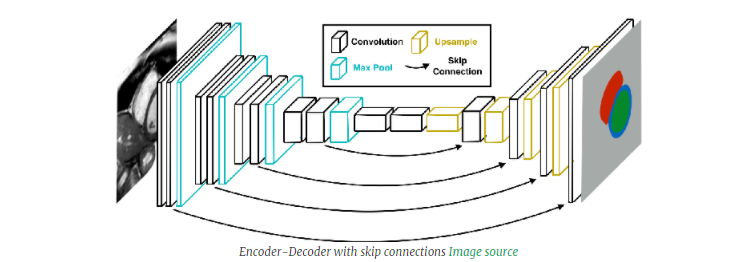

**Posibles modelos a utilizar**
Dentro de la literatura que encontramos, había una gran cantidad de modelos de redes que podíamos utilizar. Dentro de estos, resaltamos los siguientes:


*   **ResNet**: Modelo propuesto por Microsoft el cual obtuvo una precisión del 96,4% en la ImageNet 2016 Competition
*   **VGG-16**: Modelo propuesto por Oxford, obtuvo una precisión del 92,7% en la ImageNet 2013 Competition. A comparación de la anterior, posee menos capas por lo que es más rápido de entrenar.

*  **MobileNet**: Este es un modelo propuesto por Google con el objetivo de tener una red cuyo modelo fuera pequeño y fuera rápido de entrenar. Usualmente es usada en celulares y dispositivos que tengan recursos limitados.

*  **FCN**: Este modelo fue de los primeros propuestos para realizar una segmentación semántica *end-to-end*.
*   **SegNet**: Este modelo adopta una estructura como la explicada anteriormente de encoder y decoder. Las capas correspondientes a estas secciones de codificación y decodificación son simétricas.

*   **UNet**: Esta red es similar a la anterior en cuanto a su funcionamiento, y posee secciones de codificación y decodificación simétricas. Este modelo fue el escogido para realizar la segmentación en nuestro trabajo. Fue escogido principalmente por su popularidad no solo en segmentación de imágenes médicas, sino, también en su funcionamiento en la segmentación de imágenes en ambientes bajo y fuera techo.

**UNET** <br>
El modelo escogido consta principalmente en una sección de codificación de la imagen de entrada. Esta sección permite que la red vaya delimitando poco a poco la información más relevante de la imagen. Luego, entra a una etapa de decodificación en la cual la red intenta reconstruir la imagen con solamente la información importante, logrando así una segmentación de los objetos. En la Figura a continuación, se puede observar un modelo ejemplo de una UNet, la forma de U que forma las capas en esos procesos de codificación y decodificación es el origen del nombre de este modelo. 

A medida que la imagen atraviesa capas, en cada sección antes de que la imagen se reduzca, pasa a través de 2 capas convolucionales las cuales aumentan la profundidad de la imagen (Flechas azules). Luego de atravesar esas capas convolucionales, el tamaño de la imagen es reducida (Flechas rojas) y este proceso se realiza 3 veces. Finalmente, en la etapa de decodificación se realiza el proceso inverso al explicado anteriormente.


![figure 1](https://yann-leguilly.gitlab.io/img/unet_1/figure_1.png)

**Principales Capas**


*   Capa convolucional: 
<p align="justify">
En donde cada neurona no se encuentra conectada a un pixel indemendiente en la imagen sino por el contrario a píxeles en sus campos receptivos, a los cuales les aplica la operacion de convolución respectiva. A su vez la segunda capa esta conectada a una pequeña zona de la primera capa. Lo que se busca con estas capas es que las primeras capas encuentren funciones de bajo nivel y luego se reunan en funciones de nivel superior en la capa siguiente. <br><br>
*   Capa de pooling: 
<p align="justify">
El objetivo de estas capas es submuestrar la entrada para reducir la carga computacional, el uso de memoria y el úmero de parámetros. Para estas capas es necesario definir su tamaño el stride y el tipo de padding. Este tipo de capas no tiene pesos asociados, solo mapean la salida aplicando funciones como el máximo o el promedio.




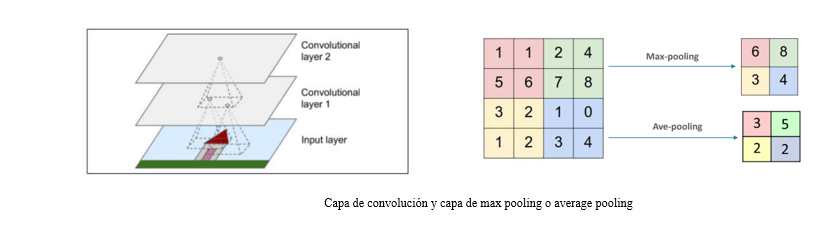

**Función de perdida** <br>
Para evaluar el desempeño de nuestro modelo se estan comparando el valor de los pixeles a la entrada frente el valor de los pixeles a la salida. Para esto, se esta utilizando la función de  SparseCategoricalCrossentropy() de tensorflow debido a que tenemos varias clases. <br><br>

**Hyperparámetros** <br>
Por el momento se han considerado los sigueintes hyperparámetros:
*   **activation:** (RELU) La función de activación para las neuronas. Si se selecciona unas no-apropiada se corre el riesgo de que se saturen las neuronas o se llene todo de ceros.
*   **kernel_initializer:** (he-normal) Inicializador para la matriz de pesos del kernel. Define la discribución de probabilidad con la que se asigan esos pesos antes de la primera iteración. 
*   **epoch:** El número de de veces que se pasa todo el dataset de entrenamiento por el modelo. Si es demasiado alto se corre el riesgo de sobreajustar el modelo a los datos de entrenamiento. 

* **Optimizador:** Se utilizó el optimizador RectifiedAdam en donde se rectifica la taza de aprendizaje adaptativa, con el fin de reducir la varianza alta que se suele presentar al comienzo del entrenamiento cuando se maneja una taza de aprendizaje adaptativa, de esta manera se busca al mismo tiempo que acelerar la convergencia del algoritmo mejorar su estabilidad. MAs información se encuentra en: https://arxiv.org/abs/1908.03265


#### **Modelamiento**<a name="id8"></a>

A continuación se presenta la contrucción del modelo y la arquitectura escogida, en este caso nuestra UNET. Toda la estructura se contruyo usando keras y tensorflow.<br> La arquitectura que se muestra esta basada en el siguiente paper
"Convolutional Networks for Biomedical Image Segmentation  https://arxiv.org/abs/1505.04597 "

In [ ]:
N_CHANNELS=3
#
# Implementación de la UNET
#

dropout_rate = 0.5
input_size = (IMG_SIZE, IMG_SIZE, N_CHANNELS)

initializer = 'he_normal'


# Capas correspondientes al encoder
# 1
inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

#  3
max_pool_enc_3 = MaxPooling2D(pool_size=(2, 2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_3)

#  4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ----------- #
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ----------- #

# Capas correspondientes al decoder
# 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

#  2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

#  4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)

#Capa de salida
output = Conv2D(151, 1, activation = 'softmax')(conv_dec_4)

In [ ]:
model = tf.keras.Model(inputs = inputs, outputs = output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Predicción**<a name="id7"></a>

Una vez que el modelo se encuentra creado y compilado, pasamos a la fase de entrenamiento. <br>

In [ ]:
###################################################
# Funciones especificas para poder visualizar
# los resultados (mascaras de nuestras predicciones).
###################################################


def create_mask(pred_mask: tf.Tensor) -> tf.Tensor:
        # Entrada [IMG_SIZE, IMG_SIZE, 3]
        # Salida [1, IMG_SIZE, IMG_SIZE, 1]
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask
    
def show_predictions(dataset=None, num=1):
        # Entrada [IMG_SIZE, IMG_SIZE, 3]
        # Salida [1, IMG_SIZE, IMG_SIZE, 3]
        one_img_batch = sample_image[0][tf.newaxis, ...]
        inference = model.predict(one_img_batch)
        pred_mask = create_mask(inference)
        display_sample([sample_image[0], sample_mask[0],
                        pred_mask[0]])

<p align="justify">
Una vez que el modelo se encuentra construido, se procedio a realizar un "sanity check" en donde se verificó que toda la red se encontrará correctamente conectada y no se presenten errores. Para esto, se evalúo el desempeño del modelo para predecir la máscara de una imagen. (Por el momento no se ha realizado entrenamiento, solo con los pesos iniciales)

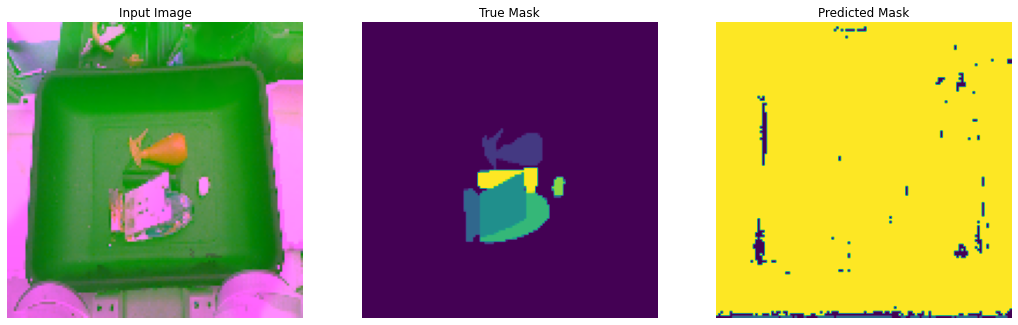

In [ ]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

<p align="justify">
Como se puede ver en la parte izquierda tenemos la imagen de entrada, en la parte del medio la mascara original de dicha imagen y en la imagen de la derecha la salida de nuestro modelo. Como es de esperarse, la salida solo consta de ruido por que no se ha realizado ningun entrenamiento previamente. Por ende, ahora si se procede a realizar el primer entrenamiento con 10 épocas

In [ ]:
EPOCHS =10

STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE

In [ ]:
# On GPU
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['val'])

Epoch 1/10
96/96 [==============================] - 13s 131ms/step - loss: 2.8899 - accuracy: 0.7033 - val_loss: 2.0600 - val_accuracy: 0.7648
Epoch 2/10
96/96 [==============================] - 12s 130ms/step - loss: 2.0062 - accuracy: 0.7311 - val_loss: 1.8074 - val_accuracy: 0.7601
Epoch 3/10
96/96 [==============================] - 13s 131ms/step - loss: 1.7645 - accuracy: 0.7359 - val_loss: 1.5923 - val_accuracy: 0.7266
Epoch 4/10
96/96 [==============================] - 13s 132ms/step - loss: 1.4745 - accuracy: 0.7709 - val_loss: 1.2794 - val_accuracy: 0.8231
Epoch 5/10
96/96 [==============================] - 13s 134ms/step - loss: 1.1265 - accuracy: 0.8419 - val_loss: 0.8947 - val_accuracy: 0.8654
Epoch 6/10
96/96 [==============================] - 13s 135ms/step - loss: 0.7409 - accuracy: 0.8715 - val_loss: 0.6445 - val_accuracy: 0.8747
Epoch 7/10
96/96 [==============================] - 13s 137ms/step - loss: 0.6509 - accuracy: 0.8800 - val_loss: 0.5972 - val_accuracy: 0.8839

Tras 10 epocas de entrenamiento se puede ver que se obtuvo un desempeño de: 

*   Training Loss: 0,5512
*   Training Accuracy: 0,8918
*   Validation Loss: 0.5436
*   Validation Accuracy: 0.8928



Con el fin de crear un mejor modelo se procedio a realizar un mejor entrenamiento y a contruir nuevos callbacks que permitan apreciar tanto de forma cualitativa como cuantitativa el desempeño de nuestro modelo

<p align="justify">
El callback que se presenta a continuación se contruyo pensando en tener el historial de cada una de nuestras métricas a lo largo del entrenamiento se implemento un callback que permite almacenar los cambios en nuestra métricas despues de cada época.

In [ ]:
#Arreglo final !
EpochMatrix=[]
TLossMatrix=[]
TAccMatrix=[]
VLossMatrix=[]
VAccMatrix=[]
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
          print('La perdida promedio para la epoch {} es {:7.2f}.'.format(epoch, logs['loss']))
          EpochMatrix.append(epoch)
          TLossMatrix.append(logs['loss'])
          TAccMatrix.append(logs['accuracy'])
          VLossMatrix.append(logs['val_loss'])
          VAccMatrix.append(logs['val_accuracy'])

Seguido a esto, se diseño un callback que permite despues de cada época ver el resultado de la predicción que esta realizando nuestro modelo. Este nos permite apreciar de forma cualitativa el desempeño realizado por nuestro módelo y tomar medidas de una forma un poco mas rapida. 

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

Contrucción final del modelo

In [ ]:
EPOCHS = 80

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

callbacks = [
    # to show samples after each epoch
    DisplayCallback(),
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=40, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet.h5', verbose=1, save_best_only=True, save_weights_only=True),

    CustomCallback()
]

model = tf.keras.Model(inputs = inputs, outputs = output)

# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tfa.optimizers.RectifiedAdam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
model.compile(optimizer=optimizer, loss = loss,
                  metrics=['accuracy'])

In [ ]:
EpochMatrix=[]
TLossMatrix=[]
TAccMatrix=[]
VLossMatrix=[]
VAccMatrix=[]

In [ ]:
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

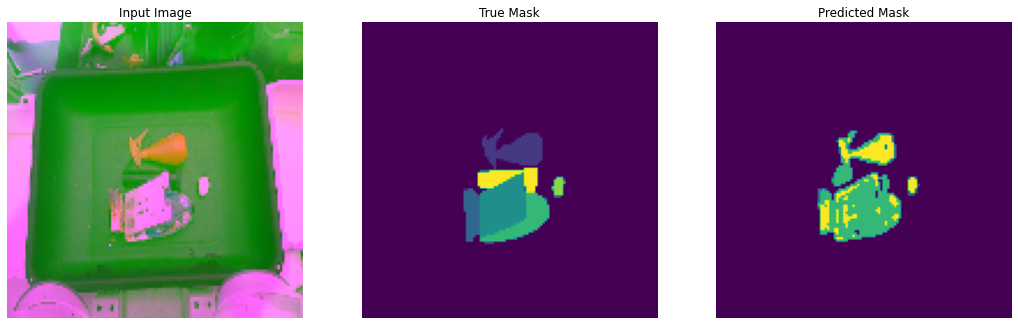


Sample Prediction after epoch 1


Epoch 00001: val_loss improved from inf to 0.09983, saving model to best_model_unet.h5
La perdida promedio para la epoch 0 es    0.10.


In [ ]:
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

## **Resultados**<a name="id7"></a>

<p align="justify">
A continuación se presentan los mejores resultados obtenidos de diferentes variaciones y pruebas que se realziarpon modificando los hyperpametros realizados sobre nuestro módelo. Inicialmente se puede apreciar que el modelo entrenado con imagenes GB+Depth destacó frente a el modelo entrenado únicamente con imagenes RGB. A pesar de que el modelo no esta en capacidad de diferencias objetos entre objetos es capaz de segmentar satisfacotriamente obejtos frente al fondo de la imagen

**PRUEBAS EN MODELOS CON INFORMACIÓN DEPTH**

In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

Ejemplo de predicciónes obtenidas

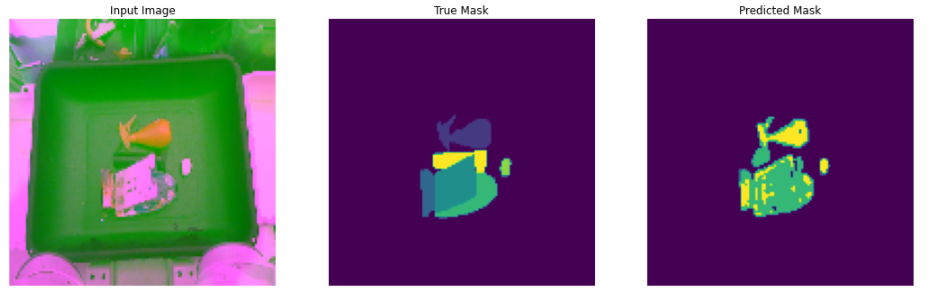

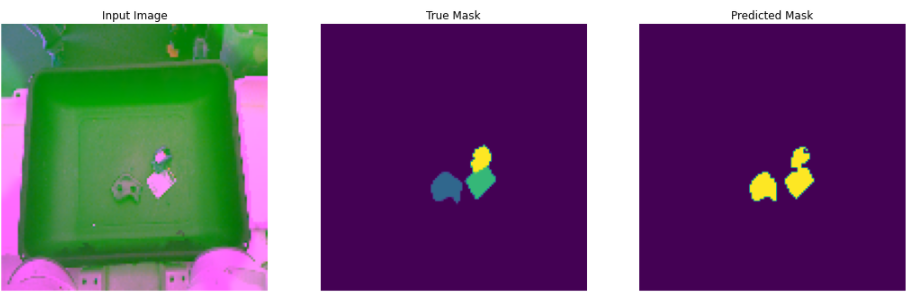

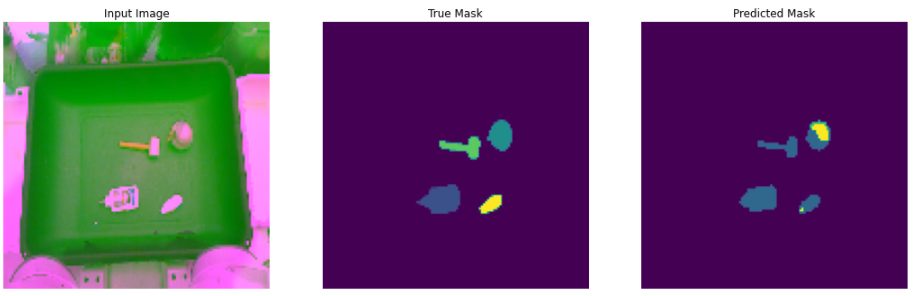

**PRUEBAS EN MODELOS CON INFORMACIÓN DEPTH (El mejor)**

Seguido a esto se realizarón variaciones en terminos de los siguientes hyperparámetros y se analizó de nuevo el desempeño del modelo
*   learning_rate=0.001
*   dropout_rate = 0.2



In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

Como se puede ver se obtuvo un desmepeño mas controlador por parte de nuestro modelo y se logro obtener un mejor accuracy, algunas predicciones obtenidas fueron: 

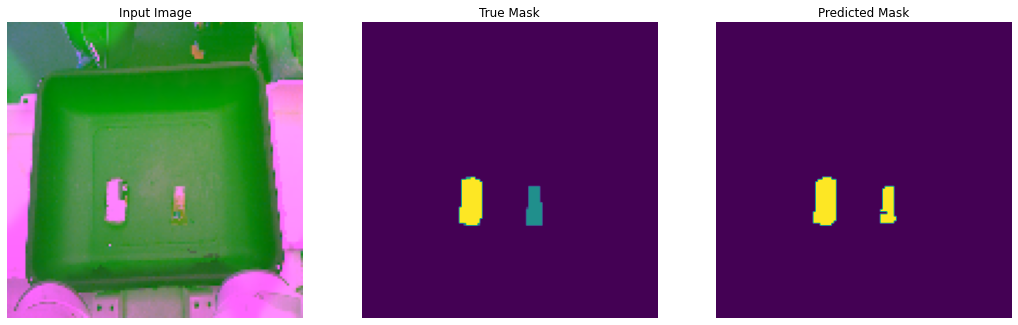

In [ ]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

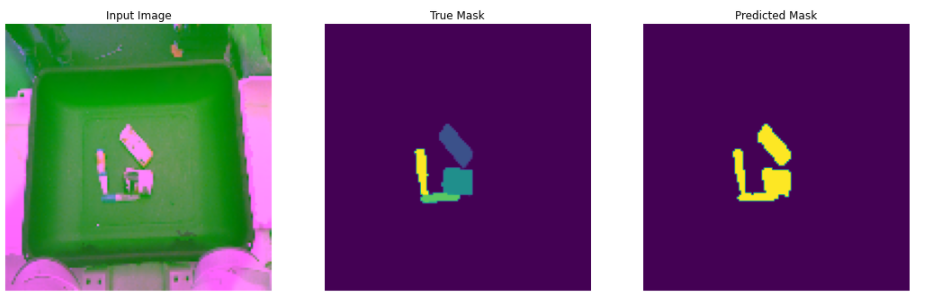

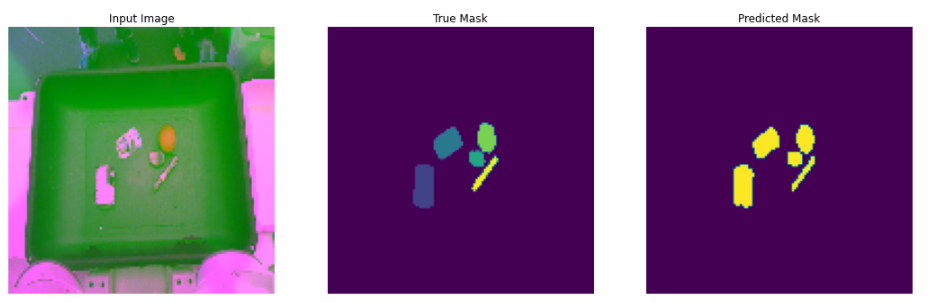

**PRUEBAS EN MODELO UNÍCAMENTE CON INFORMACIÓN RGB**

In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

Como se puede ver el modelo tuvo una gran dificultada para aprender y lograr generalizar, inicialmente la mayor cantidad de prediciónes tenian las clases de una forma contraria y no como era lo esperado 

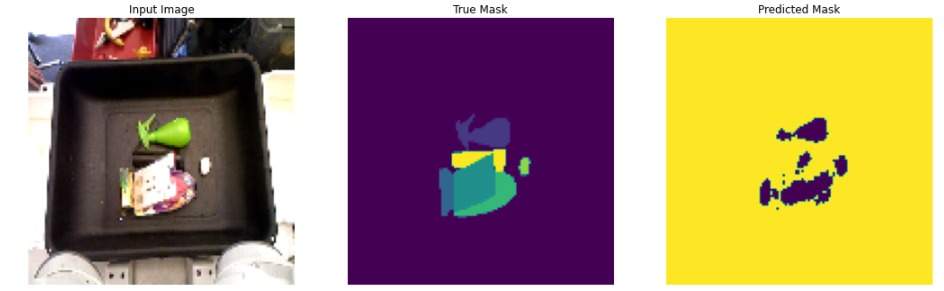

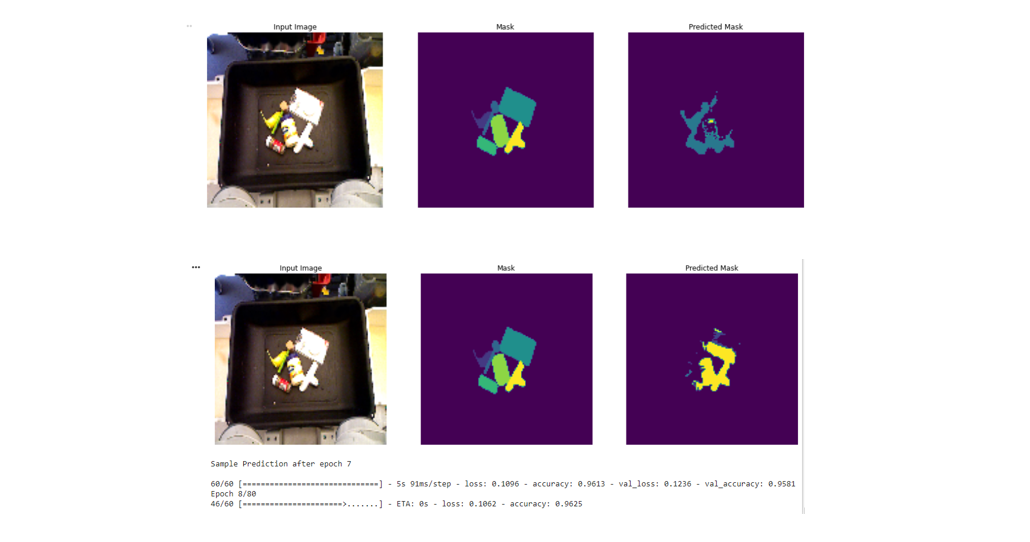

## **Discución y conlusiones**<a name="id10"></a>

<p align="justify">
En el item anterior se puede ver el desempeño que presenta nuestra UNET para la tarea de segmentación de imágenes RGB y RGB+D. El mejor modelo obtenido que se presenta es con el cual tras gran cantidad de variaciones obtenidas llegamos a una mejor aproximación. Aún así se analzan los siguientes puntos:



*   
<p align="justify">
Tras el desarrollo implementado se destaca del resultado obtenido que la UNET implementada presenta una alta eficiencia para segmentar y diferenciar los objetos del fondo de la imagen sean o no sean conocidos previamente. En las distintas pruebas realizadas y analizando las mascara resultado (predicción) se puede ver que sin importar de que el modelo se encuentre a objetos desconocidos posee una buena capacidad de generalizaron para determinar que pixeles de la imagen corresponden a objetos y cuales píxeles no. Cuando nos enfrentamos a imágenes en donde los objetos se encuentran separados, es un resultado muy satisfactorio si se considera implementar una etapa de procesamiento de imagen adicional en donde se cuenten las cantidades de regiones adyacentes con el fin de identificar cuantos objetos hay en la imagen. Adicionalmente una vez que se identifican las regiones de los objetos desconocidos se puede utilizar esa información como una máscara para nuestras imágenes RGB, de tal manera que se puedan “recortar” los diferentes objetos de la imagen original y una vez que ya son separados del fondo se puede realizar una tarea de clasificación para identificarlos teniendo únicamente los pixeles con la información relevante de cada uno. De esta manera se puede ver que a pesar de presentar una dificultadas para separar objetos desconocidos entre los mismos objetos, cuando el ambiente no es tan desordenado y los objetos se encuentran separados se logra realizar una segmentación semántica de los objetos . 


*   
<p align="justify">
En términos del modelamiento y la selección del modelo se destaca la selección de la UNET en términos de velocidad de entrenamiento y la capacidad de generalización presentada. A pesar de no contar con gran cantidad de imágenes (400, 350 de entrenamiento y 50 de validación) el modelo estuvo en capacidad de aprender a diferenciar objetos conocidos y desconocidos del fondo. Por otro lado, es relevante resaltar la utilidad del callback desarrollado para poder monitorear el desempeño del algoritmo cualitativamente a lo largo de las diferentes épocas. Este nos permite entender un poco mas que es lo que está sucediendo a lo largo del entrenamiento y poder realizar las modificaciones pertinentes. Aun así debido a que en este caso la predicción siempre se realiza sobre la misma imagen y permite ver cómo se van dando las mejoras de desempeño progresivamente, también sería útil percibir el desempeño en predicciones aleatorias para tener adicionalmente una idea un poco más global de la segmentación.

* 
<p align="justify">
A pesar del desempeño obtenido y de la apreciación tanto cuantitativa como cualitativa obtenida por nuestras métricas podemos notar que si bien el accuracy nos da un indicio del funcionamiento de nuestro modelo no es una métrica suficiente. Esto debido a que, por la naturaleza del problema y las tareas de segmentación al trabajar con problemas desbalanceados, puede que con tan solo predecir una clase se alcance un accuracy alto pero el desempeño sea deficiente. Esta fue una situación a la cual nos enfrentamos a lo largo de las pruebas y durante el entrenamiento, con tan solo predecir todo como fondo, el modelo alcanzaba un accuracy cercano al 90% lo cual no es relevante pues no se está segmentando ningún objeto. Para esto se consideraron métricas como el índice de Jackard o el coeficiente Dice, métricas enfocadas en problemas desbalanceados y en tareas de segmentación en donde se consideran las uniones y las intersecciones entre la mascara y la predicción. Aún así se trabajo por lograr implementar estos dos tipos de métricas, pero se presentaron diversos errores en la programación y en su integración con el modelo desarrollado e keras lo cual que complico su uso. 

* 
<p align="justify">
Finalmente, en términos del uso de imágenes RGB e imágenes RGB+Depth se resalta que conocer información de la profundidad a los objetos permite realizar una mejor segmentación por parte de los mismos. Esto se puede apreciar en los resultados obtenidos, en donde al usar imágenes RGB la segmentación de los objetos presenta deficiencias. Pero tras realizar el cambio del canal de la imagen Red por la información Depth de la imagen se logro obtener una segmentación mucho mas limpia de los objetos. Esto corrobora en cierta medida la hipótesis inicial que se planteo al inicio del proyecto. En donde se buscaba evidenciar que la información Depth de la imagen contribuye a entenderla mejor frente a una escena en donde solo tenemos información de color.



A continuación dejamos unos resultados interesantes a los que se llegaron en donde se logro apreciar que el modelo estaba cerca de aprender a segmentar entre los diferentes objetos. Mas áun debido a la cantidad de objetos desconocidos y las imágenes con las que se contaba, no se logro obtener una generalización esperada.

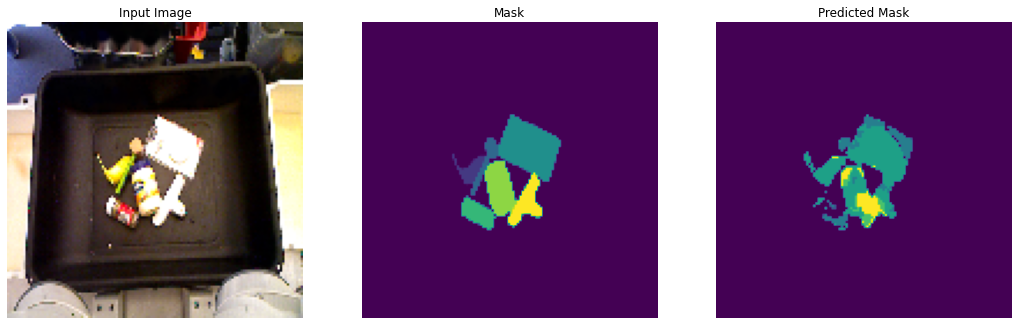


Sample Prediction after epoch 80

60/60 [==============================] - 6s 92ms/step - loss: 0.0459 - accuracy: 0.9848 - val_loss: 0.2192 - val_accuracy: 0.9608


In [ ]:

model_history2 = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['val'],
                          callbacks=callbacks)

## **Citas y Referencias**<a name="id11"></a>

 <p align="justify">
[1] el dataset de NYU

 <p align="justify">
[2] Danielczuk, Michael and Matl, Matthew and Gupta, Saurabh and Li, Andrew and Lee, Andrew and Mahler, Jeffrey and Goldberg, Ken, "Segmenting Unknown 3D Objects from Real Depth Images using Mask R-CNN Trained on Synthetic Data", Proc. IEEE Int. Conf. Robotics and Automation (ICRA), 2019.

